## 데이터 불러오기 및 사용할 라이브러리 불러오기

In [83]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train_df = pd.read_csv('./dataset/train.csv')
train_df.head()

,id,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
0,1,M,0.605,0.470,0.115,1.1140,0.3925,0.2910,0.3100,15
1,2,I,0.430,0.315,0.095,0.3780,0.1750,0.0800,0.1045,8
2,3,I,0.580,0.490,0.195,1.3165,0.5305,0.2540,0.4100,18
3,4,M,0.535,0.405,0.175,1.2705,0.5480,0.3265,0.3370,13
4,5,I,0.310,0.235,0.090,0.1270,0.0480,0.0310,0.0400,6


## 데이터 인코딩
문자열 데이터 Gender를 숫자형으로 표현합니다.
숫자형으로 표현하기 위해서 baseline에서 주어진 코드를 활용합니다!

In [84]:
#라벨인코딩을 하기 위함 dictionary map 생성 함수
def make_label_map(dataframe):
    label_maps = {}
    for col in dataframe.columns:
        if dataframe[col].dtype=='object':
            label_map = {'unknown':0}
            for i, key in enumerate(dataframe[col].unique()):
                label_map[key] = i+1  #새로 등장하는 유니크 값들에 대해 1부터 1씩 증가시켜 키값을 부여해줍니다.
            label_maps[col] = label_map
    print(label_maps)
    return label_maps

# 각 범주형 변수에 인코딩 값을 부여하는 함수
def label_encoder(dataframe, label_map):
    for col in dataframe.columns:
        if dataframe[col].dtype=='object':
            dataframe[col] = dataframe[col].map(label_map[col])
            dataframe[col] = dataframe[col].fillna(label_map[col]['unknown']) #혹시 모를 결측값은 unknown의 값(0)으로 채워줍니다.
    return dataframe

In [85]:
train_le = make_label_map(train_df[['Gender']])
gender_df = label_encoder(train_df[['Gender']], train_le)
train_df['Gender'] = gender_df[['Gender']]

{'Gender': {'unknown': 0, 'M': 1, 'I': 2, 'F': 3}}


In [86]:
train_df['Gender'].unique()

array([1, 2, 3])

label은 unkown부터 0에서 3까지 존재하지만 사용된 label은 1 2 3 뿐임을 확인합니다

## 데이터 분석 및 시각화

각 column들 사이의 상관관계를 heatmap으로 확인합니다! 0에 가까울수록 서로 관계가 없고, 1에 가까울 수록 양의 상관관계가, -1로 음의 상관관계를 갖습니다.

이번데이터는 양의 상관관계만 갖는 것을 확인할 수 있습니다.
임의로 정해준 id와 gender는 상관관계를 보이지 않음을 확인할 수 있습니다

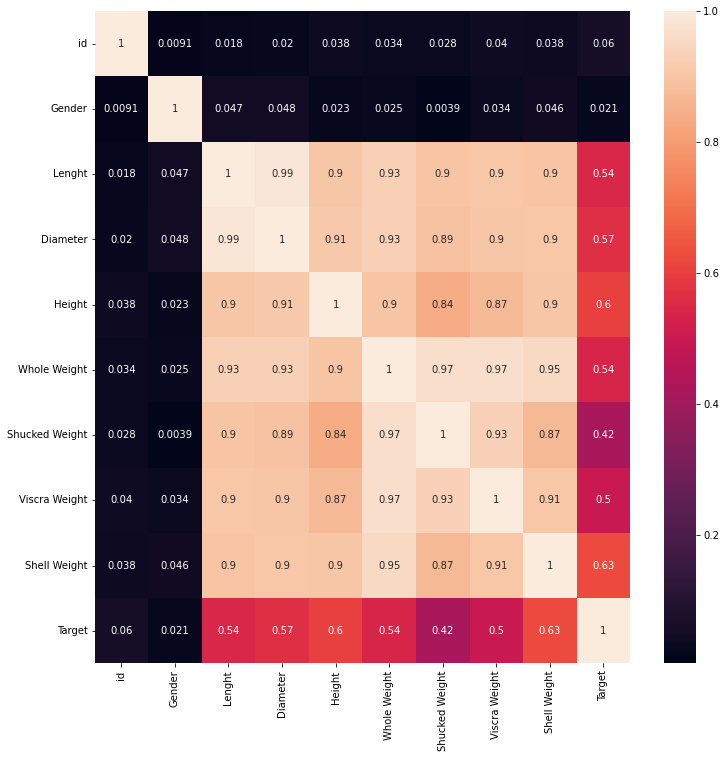

In [87]:
plt.figure(figsize=(12, 12))
sns.heatmap(train_df.corr(), annot=True)
plt.show()

## 성별에 관계없이 확인해보기

Length부터 Target까지 8가지의 column을 histogram으로 분포를 확인해보겠습니다

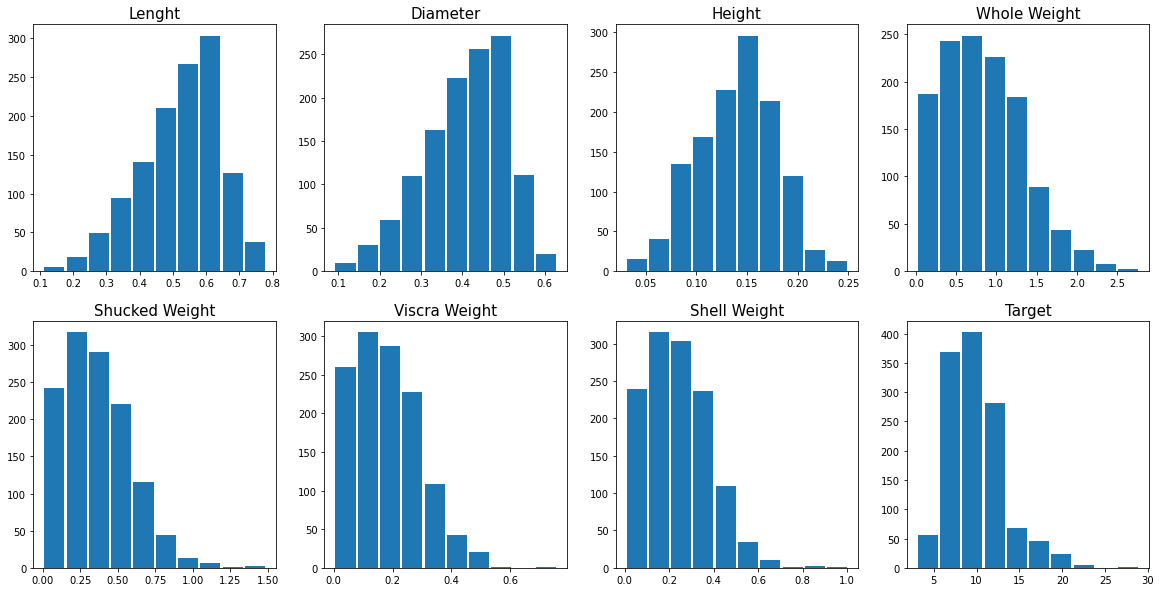

In [88]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

for index, column in enumerate(train_df.columns[2:]):
    axes[index//4, index%4].set_title(column, size=15)
    axes[index//4, index%4].hist(train_df[column], rwidth=0.9)

plt.show()

## 성별에 따라 확인해보기

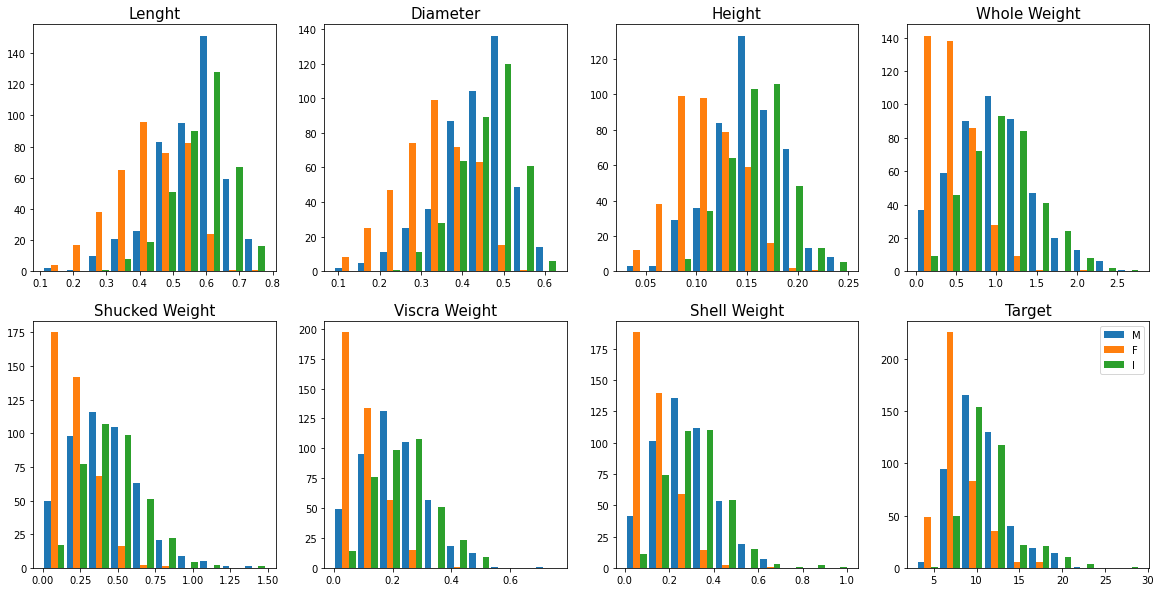

In [89]:
male = train_df[train_df['Gender']==1]
female = train_df[train_df['Gender']==2]
other = train_df[train_df['Gender']==3]


fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

for index, column in enumerate(train_df.columns[2:]):
    axes[index//4, index%4].set_title(column, size=15)
    axes[index//4, index%4].hist((male[column], female[column], other[column]), label=('M', 'F', 'I'), rwidth=0.9)

plt.legend()
plt.show()

## 모델 학습하기

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression

In [91]:
data_x = train_df.drop(['id', 'Target'], axis=1)
data_y = train_df.Target

x_train, x_valid, y_train, y_valid = train_test_split(data_x, data_y, test_size=0.2, random_state=42)


In [92]:
liner_regression = LinearRegression()
liner_regression.fit(x_train, y_train)

LinearRegression()

## 모델 성능 확인하기

In [93]:
pred_y = liner_regression.predict(x_valid)

In [94]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_valid, pred_y)

1.5271467162600805

## 학습된 모델로 결과 생성하기

In [95]:
test_df = pd.read_csv('./dataset/test.csv')
test_df.head()

,id,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight
0,1,F,0.595,0.470,0.155,1.121,0.4515,0.1780,0.1550
1,2,M,0.580,0.450,0.150,0.927,0.2760,0.1815,0.3600
2,3,I,0.260,0.205,0.070,0.097,0.0415,0.0190,0.0305
3,4,M,0.590,0.460,0.130,1.102,0.4550,0.2055,0.3300
4,5,F,0.595,0.465,0.140,1.113,0.5175,0.2440,0.3050


In [96]:
gender_df = label_encoder(test_df[['Gender']], train_le)
test_df['Gender'] = gender_df[['Gender']]

test_df.head()

,id,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight
0,1,3,0.595,0.470,0.155,1.121,0.4515,0.1780,0.1550
1,2,1,0.580,0.450,0.150,0.927,0.2760,0.1815,0.3600
2,3,2,0.260,0.205,0.070,0.097,0.0415,0.0190,0.0305
3,4,1,0.590,0.460,0.130,1.102,0.4550,0.2055,0.3300
4,5,3,0.595,0.465,0.140,1.113,0.5175,0.2440,0.3050


In [97]:
test_x = test_df.drop(['id'],axis=1)
prediction = liner_regression.predict(test_x)

In [98]:
submission = pd.read_csv('./dataset/sample_submission.csv')
submission.head()

,id,Target
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [102]:
submission.to_csv('linear_regression_submit.csv', index=False)

In [103]:
submission['Target'] = prediction

# 데이터가 잘 들어갔는지 확인합니다
submission

,id,Target
0,1,11.809333
1,2,13.619081
2,3,6.681191
3,4,11.230800
4,5,9.600564
...,...,...
2919,2920,4.815712
2920,2921,8.130819
2921,2922,9.815946
2922,2923,9.198203
